# Data Analysis on Pollution

In [40]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset
data = pd.read_csv('Pollution.csv')

Description of the Dataset is as follows:

1. stn_code : Station code. A code is given to each station that recorded the data.

2. sampling_date: The date when the data was recorded.

3. state: It represents the states whose air quality data is measured.

4. location: It represents the city whose air quality data is measured.

5. agency: Name of the agency that measured the data.

6. type: The type of area where the measurement was made.

7. so2: The amount of Sulphur Dioxide measured.

8. no2: The amount of Nitrogen Dioxide measured.

9. rspm: Respirable Suspended Particulate Matter measured.

10. spm: Suspended Particulate Matter measured.

11. location_monitoring_station: It indicates the location of the monitoring area.

12. pm2_5: It represents the value of particulate matter measured.

13. date: It represents the date of recording.

In [4]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


# Perform EDA(Exploratory Data Analysis)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
#check the null values
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
#replace the State from Uttaranchal to Uttarakhand
replace = {'state': {r'Uttaranchal':'Uttarkhand',}}
data.replace(replace, regex = True, inplace = True)

In [8]:
data['agency'].value_counts()

#Date format- mm/dd/yyyy
data['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [9]:
#deleting all values which have null in type attribute
data = data.dropna(axis = 0, subset = ['type'])

#deleting all values which are null in location attribute
data = data.dropna(axis = 0, subset = ['location'])

#deleting all null values in SO2 attribute
data = data.dropna(axis = 0, subset = ['so2'])

In [10]:
data.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [11]:
#Dont need Agency, location_monitoring_station, stn_code,sampling_date 
del data['agency']
del data['location_monitoring_station']
del data['stn_code']
del data['sampling_date']

In [12]:
#dataset after deleting the above columns
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [13]:
data.shape

(396161, 9)

In [14]:
#changing type to only 3 categories
a = list(data['type'])
for i in range(0, len(data)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'

In [15]:
data['type'] = a
data['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

# Data Visualization

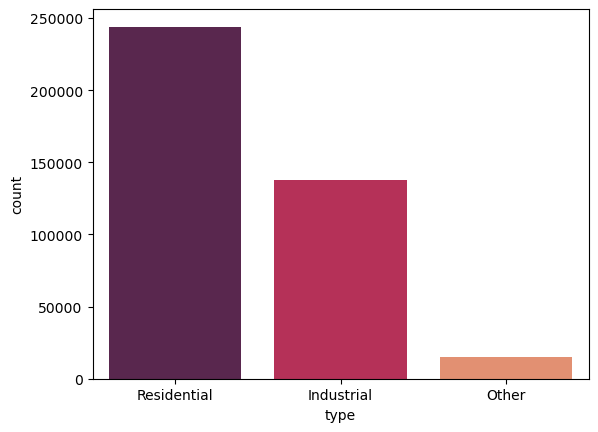

In [16]:
#How many observations belong to each location
sns.countplot(data=data, x="type", palette='rocket')
plt.show()

# Effect of so2 in different states

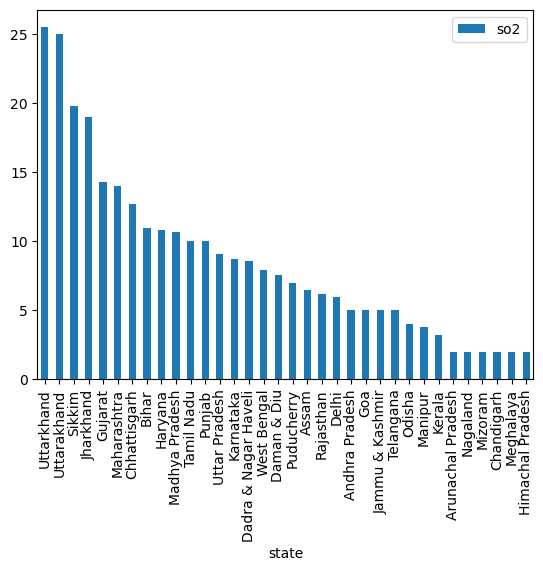

In [17]:
#bar plot of so2 vs state - desc order
data[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()
plt.show()

Conclusion: We can conclude that the effect of so2 is highest in Uttarakhand and lowest in Arunachal Pradesh.

# Effect of no2 in different states

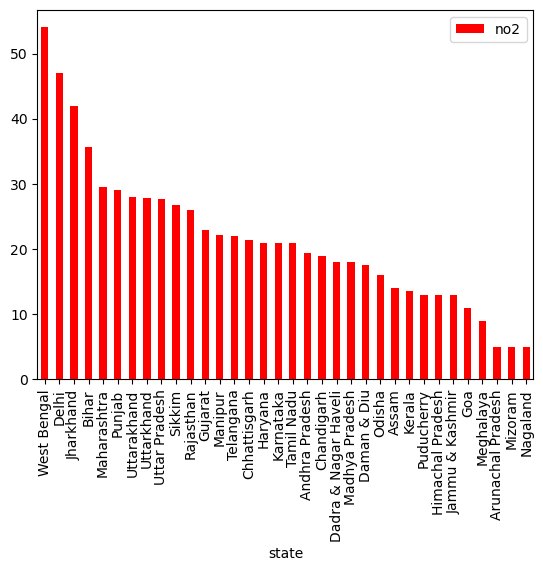

In [18]:
# bar plot of no2 vs state - desc order
data[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')
plt.show()

Conclusion: We can conclude that the effect of no2 is highest in West Bengal and lowest in Nagaland.

# Effect of rspm in different states

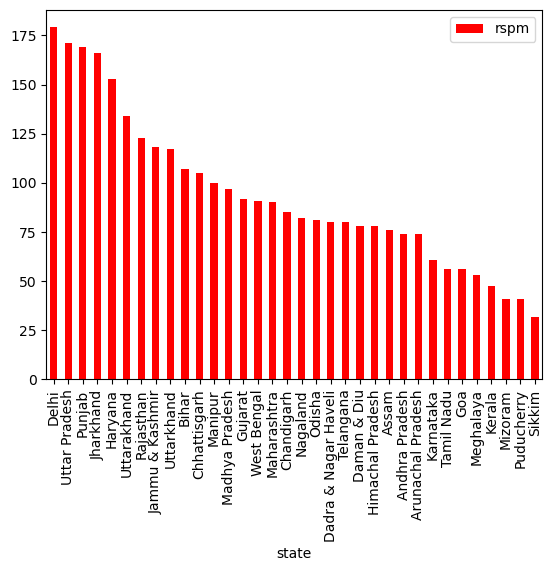

In [19]:
# rspm = PM10
data[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')
plt.show()

Conclusion: The effect of rspm is higest in Delhi and lowest in Sikkim.

# Effect of spm in different states.

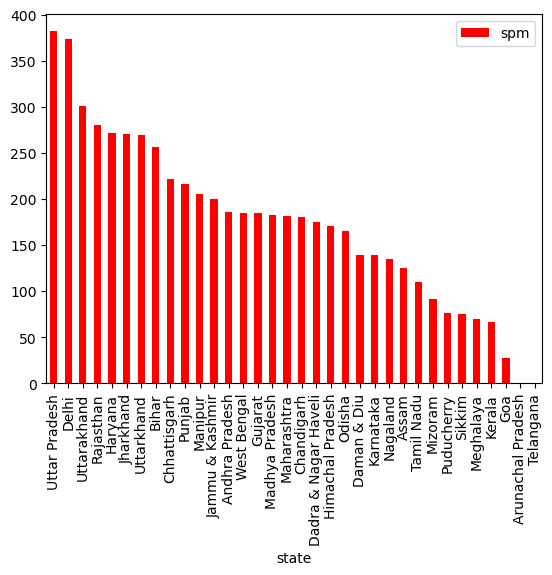

In [20]:
#spm
data[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')
plt.show()

Conclusion: The effect of spm is highest in Uttar Pradesh and lowest in Telangana and Arunachal Pradesh.

Note: Delhi and Uttar Pradesh both are Neighboring states and both are highly affected by spm and rspm.

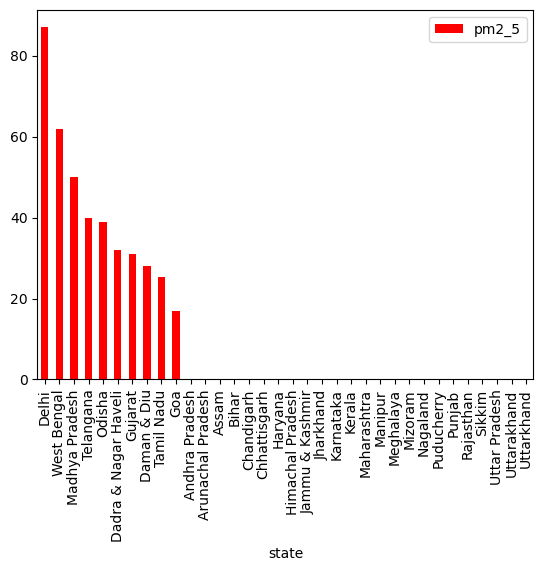

In [21]:
# pm2_5
data[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')
plt.show()

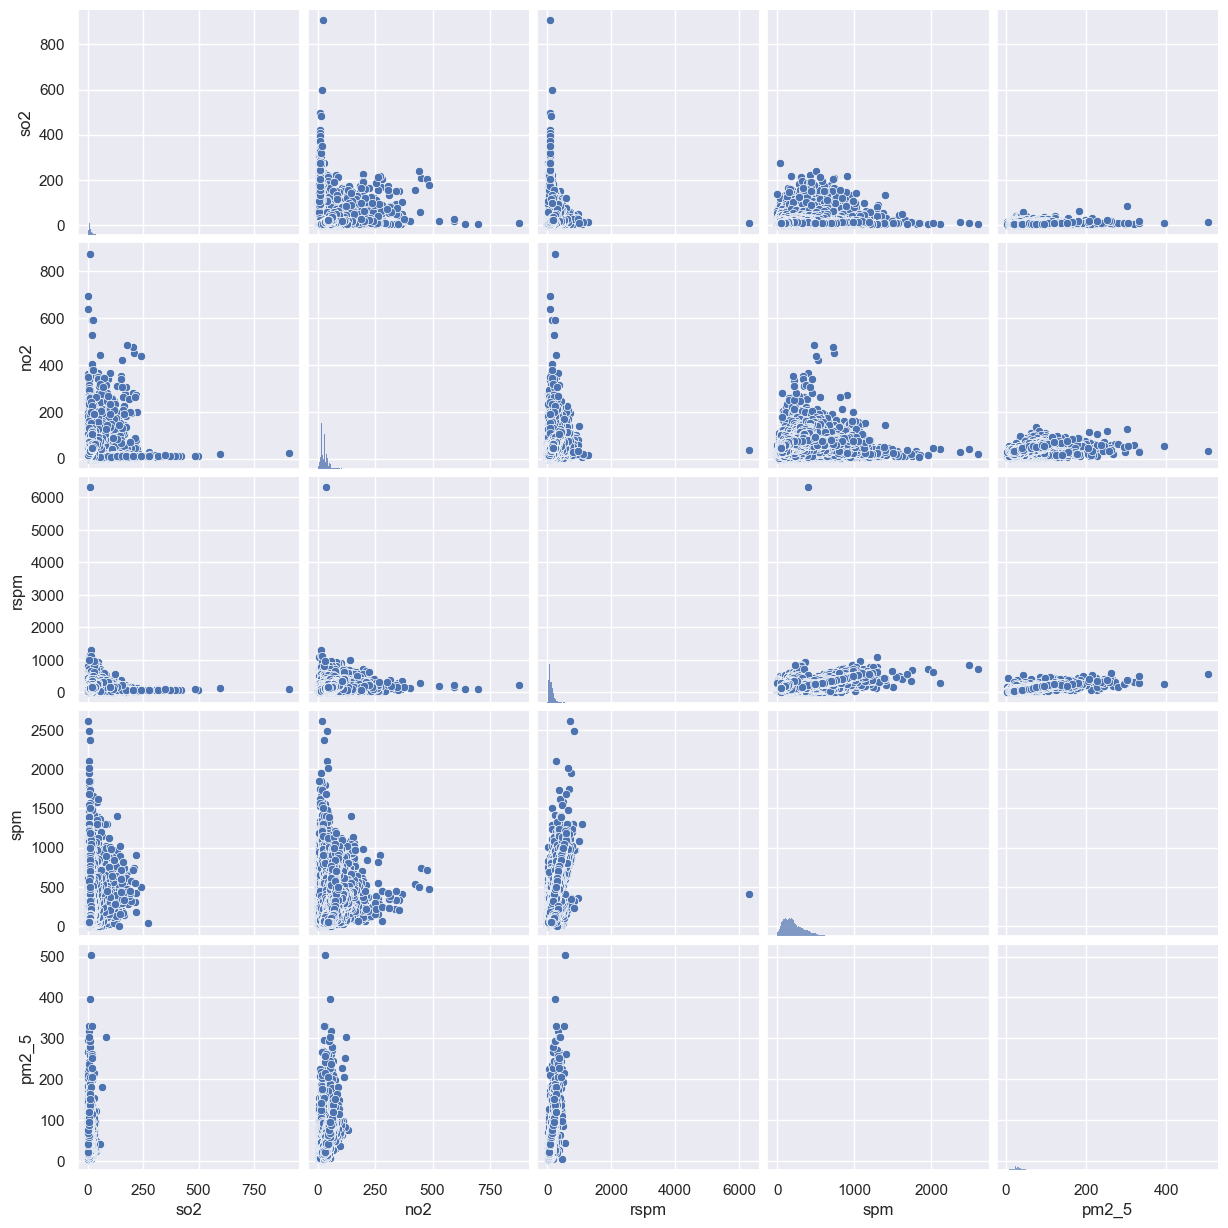

In [22]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(data[cols], size = 2.5)
plt.show()

<Axes: >

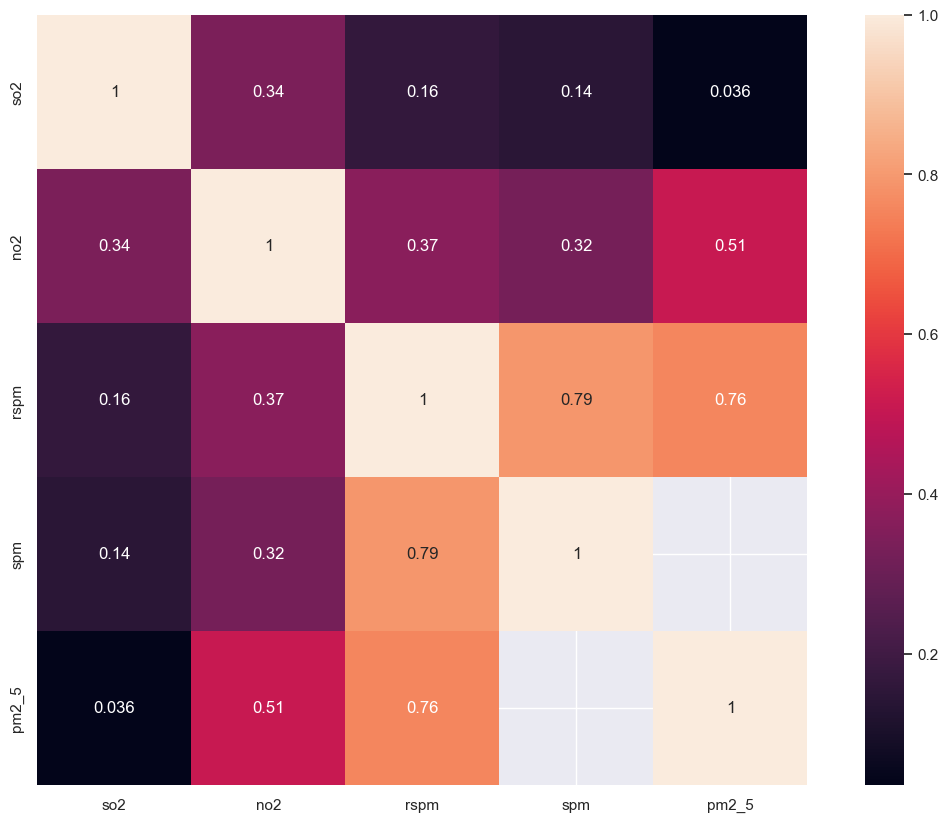

In [23]:
#Correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)


In [24]:
# Creating a year column
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y')
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

In [25]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


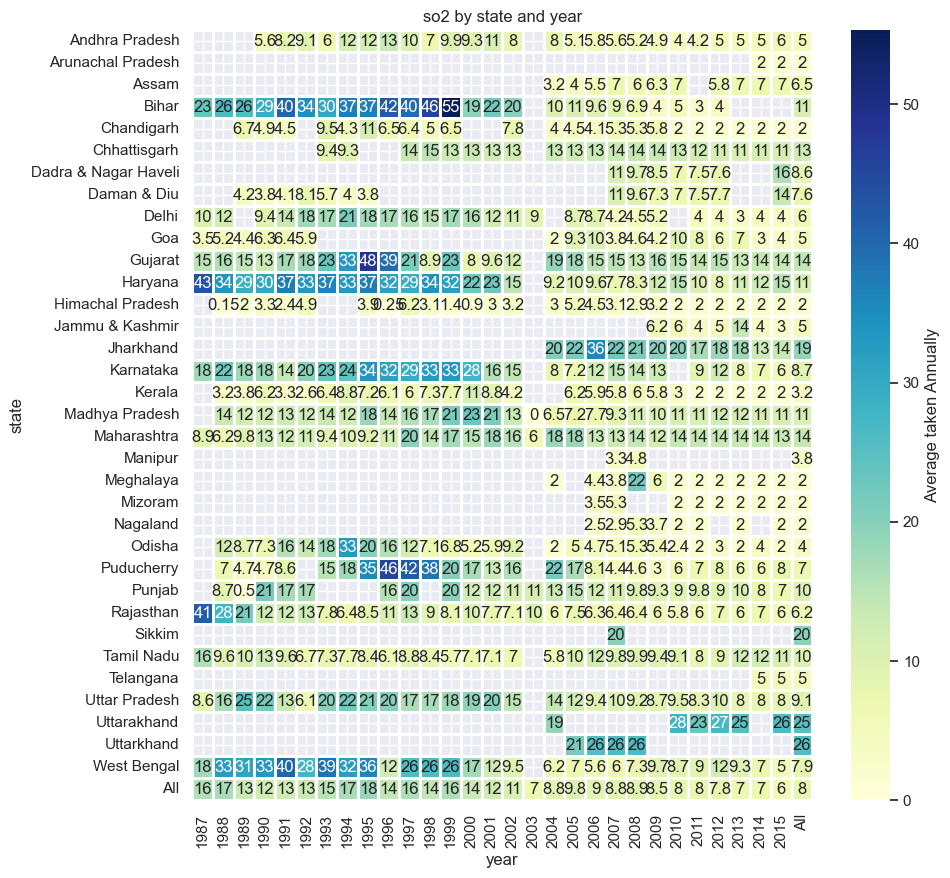

In [26]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})
plt.show()

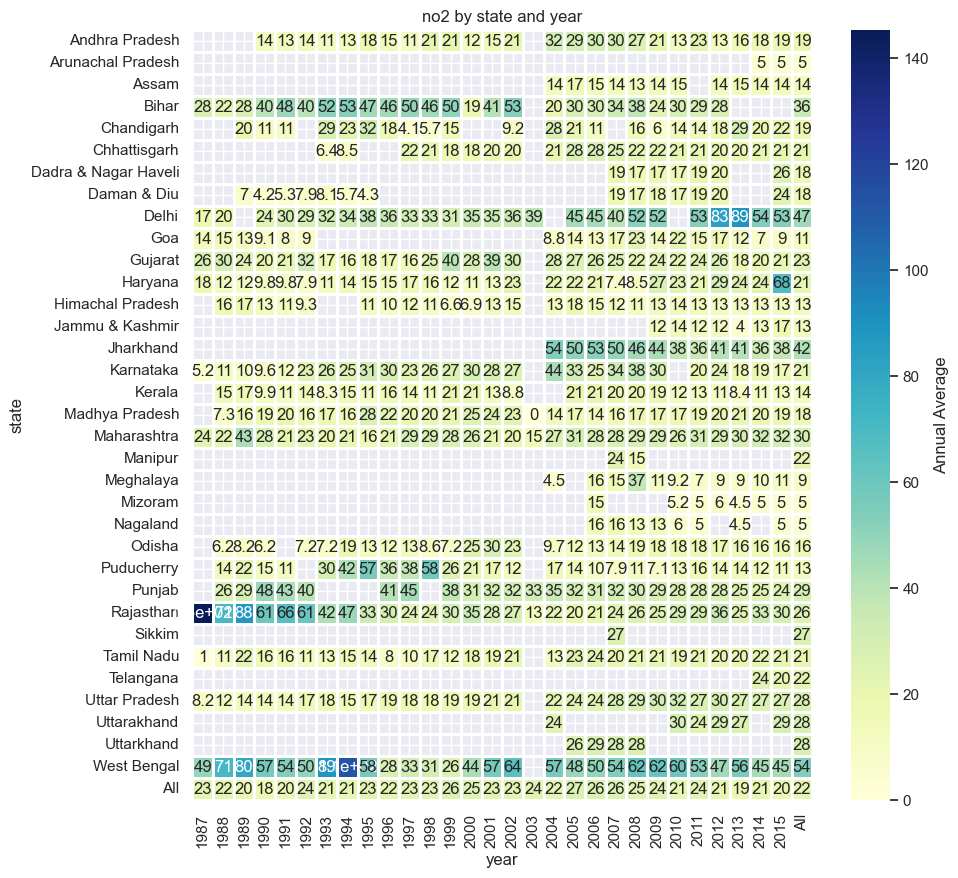

In [27]:
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})
plt.show()

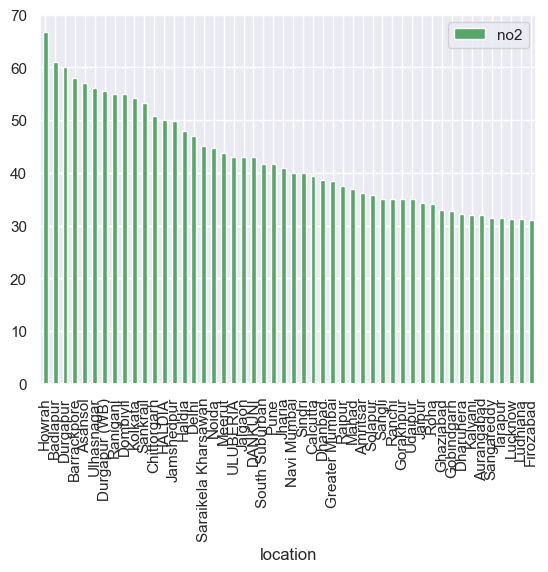

In [28]:
# bar plot of no2 vs location - desc order - first 50
data[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')
plt.show()

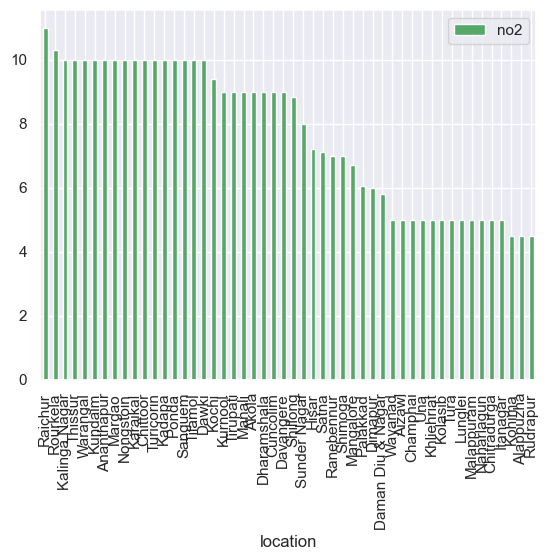

In [29]:
# bar plot of no2 vs location - desc order - last 50
data[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')
plt.show()

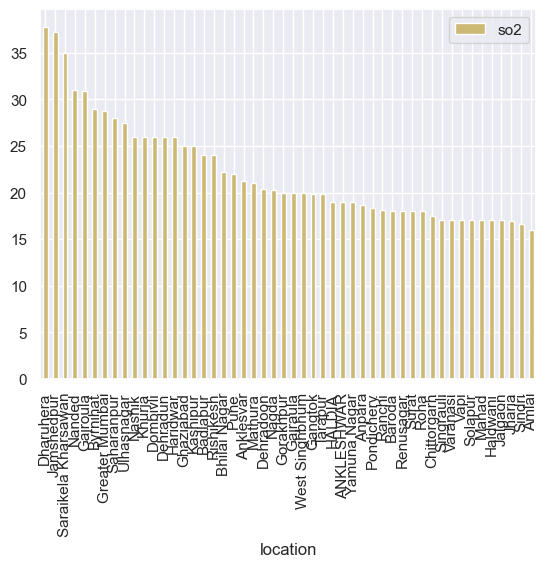

In [30]:
# bar plot of so2 vs location - desc order
data[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')
plt.show()

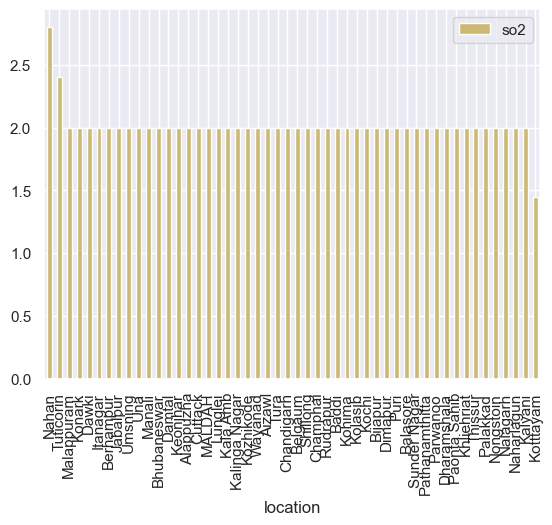

In [31]:
# bar plot of no2 vs location - desc order
data[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')
plt.show()

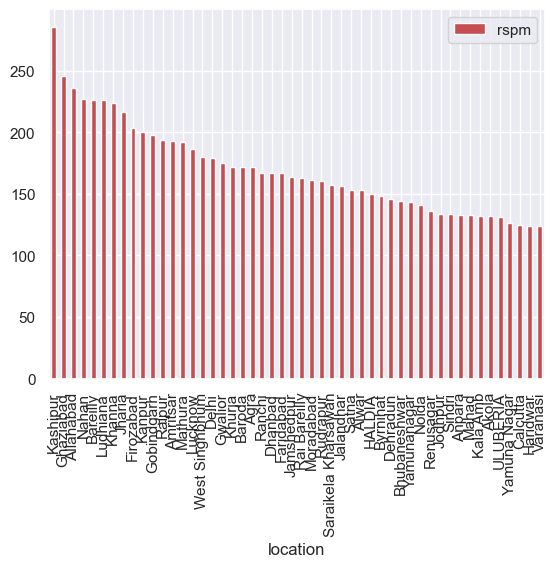

In [32]:
# rspm = PM10 - location wise - first 50
data[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')
plt.show()

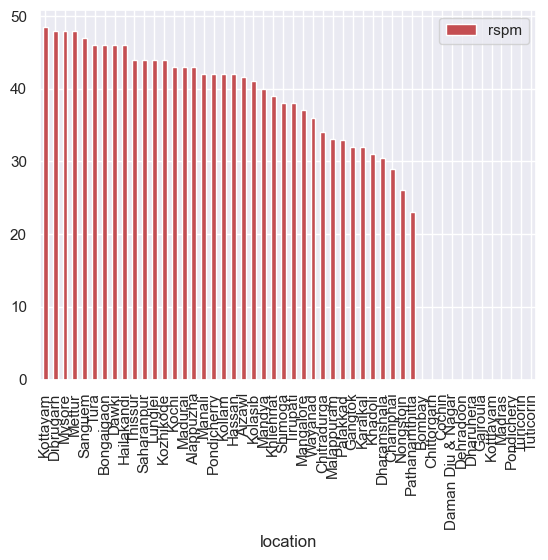

In [33]:
# rspm = PM10 - location wise - last 50
data[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')
plt.show()

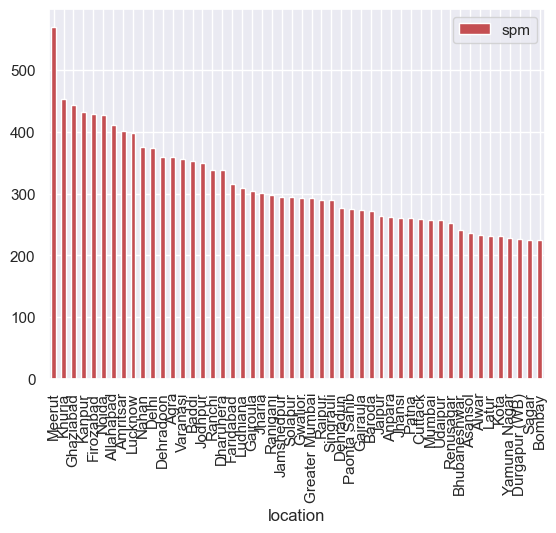

In [34]:
# spm = PM10 - location wise - first 50
data[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')
plt.show()

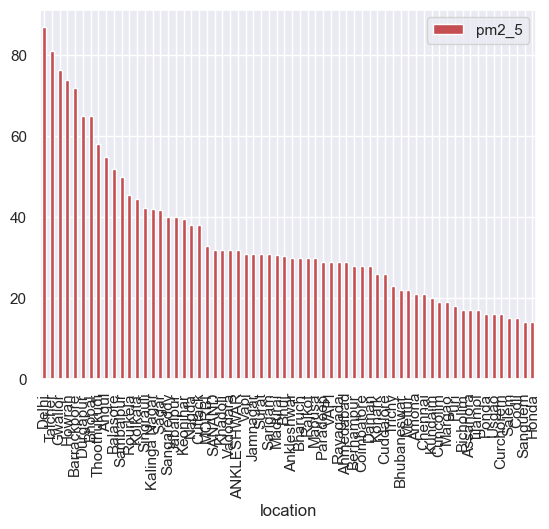

In [35]:
# pm2_5 vs location - all non null values
data[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')
plt.show()

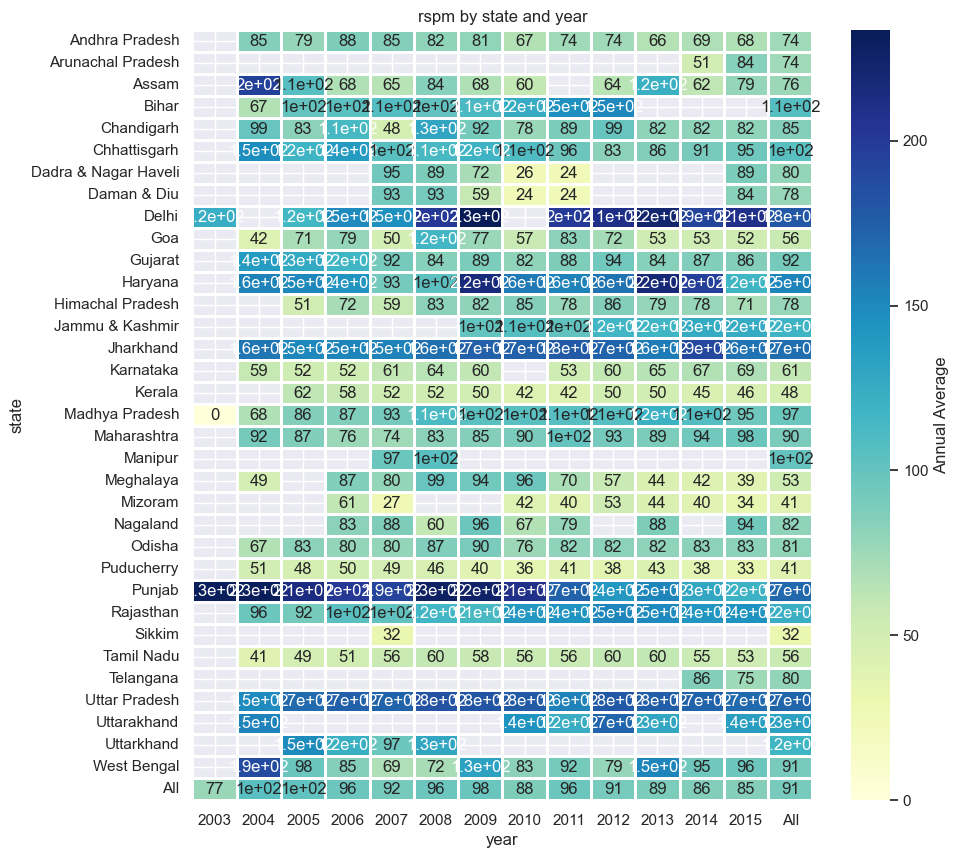

In [36]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(data.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})
plt.show()

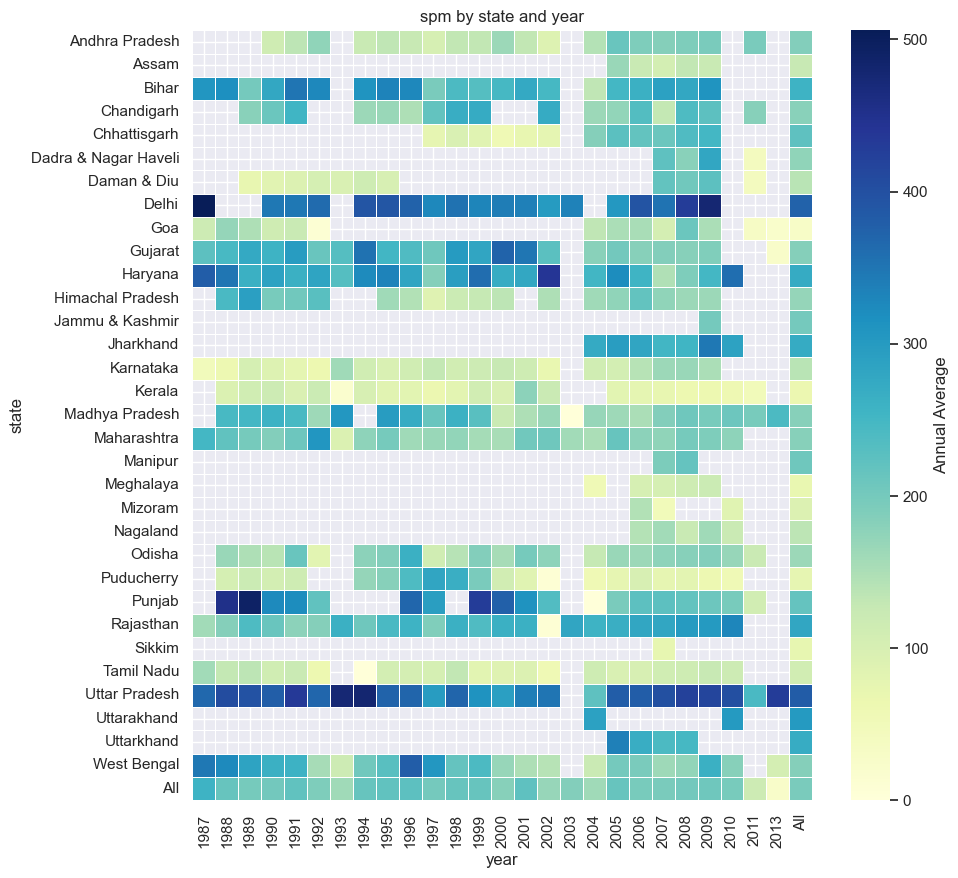

In [37]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(data.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})
plt.show()

In [38]:
#import the another library
from ydata_profiling import ProfileReport

In [39]:
prof = ProfileReport(data)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]